# Import Packages and Data set

In [105]:
# EDA - Data Cleaning
import pandas as pd
import numpy as np
import missingno
from collections import Counter
import math

# EDA - Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

#Modeling
from sklearn import (datasets,
                     metrics,
                     model_selection as skms,
                     naive_bayes,
                     neighbors)

from sklearn.linear_model import (LogisticRegression)

from sklearn.model_selection import (cross_val_score,
                                     cross_val_predict,
                                     train_test_split,
                                     GridSearchCV)
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             confusion_matrix,
                             f1_score,
                             roc_curve,
                             auc,
                             classification_report,
                             precision_recall_curve)

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# logistic regression model
import statsmodels.api as sm 

pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

pd.options.display.float_format = '{:.2f}'.format

# Define Functions

In [106]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("Initial Accuracy Score:  {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))),'-'*40)
            
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n") 
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test)))) 
        print("Initial Accuracy Score:  {0:.4f}".format(accuracy_score(y_test, clf.predict(X_test))))

# Import Dataset

In [147]:
df = pd.read_csv('modified/finalproject_df.csv')

# Review Dependant Variable Split (DV)

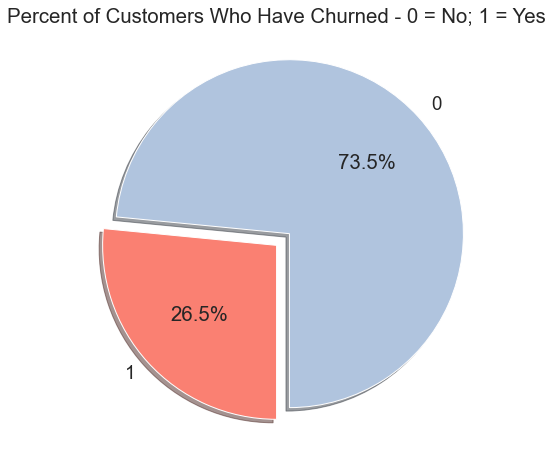

In [148]:
# Data to plot for the % of target variable
sns.set(font_scale = 1.7)
labels =df['Churn'].value_counts(sort = True).index
sizes = df['Churn'].value_counts(sort = True)
colors = ["lightsteelblue","salmon"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percent of Customers Who Have Churned - 0 = No; 1 = Yes')
plt.show()

# Logistic Regression - Initial Run

## Generate Dummy Variables

In [151]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1.00,No phone service,No,Yes,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34.00,No,Yes,No,Yes,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2.00,No,Yes,Yes,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45.00,No phone service,Yes,No,Yes,Yes,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2.00,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24.00,Yes,Yes,No,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72.00,Yes,No,Yes,Yes,No,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11.00,No phone service,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4.00,Yes,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [152]:
binary_cols=[]
multi_Value=[]
for col in df.columns:
    if df[col].dtype =='object':
        if df[col].unique().shape[0]==2:
            binary_cols.append(col)
        else:
            multi_Value.append(col)
            
multi_Value

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [153]:
for col in df.dtypes[df.dtypes == object].index:
    print(col,'\n', df[col].unique())

MultipleLines 
 ['No phone service' 'No' 'Yes']
OnlineSecurity 
 ['No' 'Yes' 'No internet service']
OnlineBackup 
 ['Yes' 'No' 'No internet service']
DeviceProtection 
 ['No' 'Yes' 'No internet service']
TechSupport 
 ['No' 'Yes' 'No internet service']
StreamingMovies 
 ['No' 'Yes' 'No internet service']
Contract 
 ['Month-to-month' 'One year' 'Two year']
PaymentMethod 
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [154]:
multi = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines').drop(columns=['MultipleLines_No phone service'])
onlsec = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity').drop(columns=['OnlineSecurity_No internet service'])
onlbac = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup').drop(columns=['OnlineBackup_No internet service'])
devpro = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection').drop(columns=['DeviceProtection_No internet service'])
tecsup = pd.get_dummies(df['TechSupport'], prefix='TechSupport').drop(columns=['TechSupport_No internet service'])
strmov = pd.get_dummies(df['StreamingMovies'], prefix='StreamingMovies').drop(columns=['StreamingMovies_No internet service'])
contr = pd.get_dummies(df['Contract'], prefix='Contract').drop(columns=['Contract_One year'])
pmtmth = pd.get_dummies(df['PaymentMethod'], prefix='PaymentMethod').drop(columns=['PaymentMethod_Bank transfer (automatic)'])

df1 = df.join(multi)
df1 = df1.join(onlsec)
df1 = df1.join(onlbac)
df1 = df1.join(devpro)
df1 = df1.join(tecsup)
df1 = df1.join(strmov)
df1 = df1.join(contr)
df1 = df1.join(pmtmth)

In [155]:
df1.head(3).T

,0,1,2
gender,1,0,0
SeniorCitizen,0,0,0
Partner,1,0,0
Dependents,0,0,0
tenure,1.00,34.00,2.00
MultipleLines,No phone service,No,No
OnlineSecurity,No,Yes,Yes
OnlineBackup,Yes,No,Yes
DeviceProtection,No,Yes,No
TechSupport,No,No,No


In [156]:
#Dropping columns due to dummy variable additions
df2 = df1.drop(columns=['MultipleLines', 
                        'OnlineSecurity',
                        'OnlineBackup', 
                        'DeviceProtection', 
                        'TechSupport',
                        'StreamingMovies',
                        'Contract',
                        'PaymentMethod'])

In [157]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1.00,1,29.85,29.85,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0
1,0,0,0,0,34.00,0,56.95,1889.50,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1
2,0,0,0,0,2.00,1,53.85,108.15,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1
3,0,0,0,0,45.00,0,42.30,1840.75,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0
4,1,0,0,0,2.00,1,70.70,151.65,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24.00,1,84.80,1990.50,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1
7039,1,0,1,1,72.00,1,103.20,7362.90,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11.00,1,29.60,346.45,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0
7041,0,1,1,0,4.00,1,74.40,306.60,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1


## Review Data Correlations

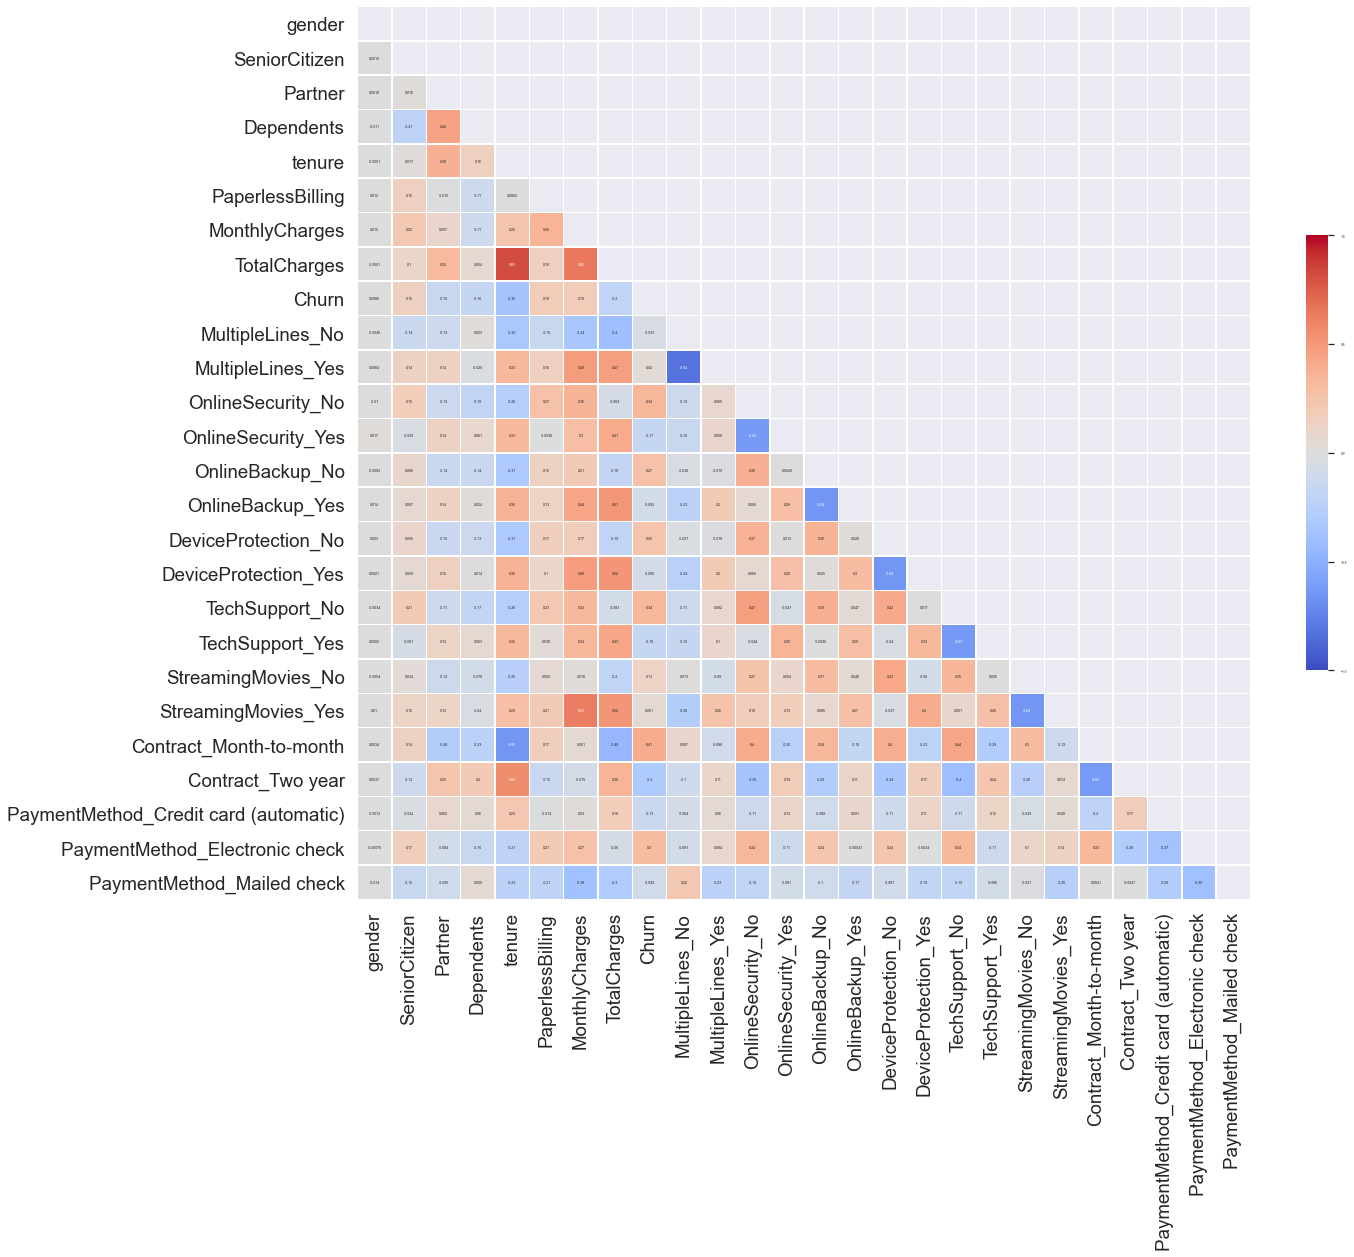

In [158]:
corr_matrix = df2.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(20, 20))

sns.set(font_scale = .3)

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True)


#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [159]:
# Output any correlated values over 0.65 - isolating high-correlated variables to remove from the analysis
def high_corr_and_check(X):
    corr_matrix = X.corr().abs()
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), 
                                     k=1).astype(np.bool))
                      .stack()
                      .sort_values(ascending=False))
    for index, value in sol.items():
        if value > 0.69:
            print(index,value)
            
high_corr_and_check(df2)

('tenure', 'TotalCharges') 0.8261051034659136
('MultipleLines_No', 'MultipleLines_Yes') 0.8228533739769971


In [162]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1.00,1,29.85,29.85,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0
1,0,0,0,0,34.00,0,56.95,1889.50,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1
2,0,0,0,0,2.00,1,53.85,108.15,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1
3,0,0,0,0,45.00,0,42.30,1840.75,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0
4,1,0,0,0,2.00,1,70.70,151.65,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24.00,1,84.80,1990.50,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1
7039,1,0,1,1,72.00,1,103.20,7362.90,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11.00,1,29.60,346.45,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0
7041,0,1,1,0,4.00,1,74.40,306.60,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1


In [161]:
# get independent variables
X = df2.drop(columns=['Churn'])
# to get intercept -- this is optional
# X = sm.add_constant(X)
# get response variables
Y = df2[['Churn']]
# fit the model with maximum likelihood function
model = sm.Logit(Y, X).fit()
# output message
# Optimization terminated successfully.
#          Current function value: 0.147065
#          Iterations 10

print(model.summary())
# output

Optimization terminated successfully.
         Current function value: 0.416892
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7022
Method:                           MLE   Df Model:                           20
Date:                Sat, 24 Apr 2021   Pseudo R-squ.:                  0.2795
Time:                        22:28:09   Log-Likelihood:                -2936.2
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
gender                                   -0.0341     